# 1 - Regressão Multivariada

5) Rode uma regressão multipla que explique o abandono dos cursos, será que professores mais/menos preparados influência nessas taxas?

VD: taxa de abandono:

* % de alunos que não estão cursando ou formados por curso

VI:  taxa de docentes por grau de instrução por Instituição

* taxa Espcecialização
* taxa Mestrado
* taxa Doutorado

Entender se cursos em Instituições com maior taxa de professores mais qualificados têm uma menor taxa de abandono.

In [1]:
# abrir bibliotecas
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

## Estratégia 01 - Regressão Linear

Estamos calculando como o quadro de docentes da instituição influencia na taxa de abandono o curso.

### Planilhas

* Alunos
* Docentes
* Cine
* Curso
* DM_IES

#### Alunos

In [2]:
# abrir df aluno
## 1 milhao de linhas
df_aluno_completa = pd.read_csv('C:/Users/camil/Desktop/dados/DM_ALUNO.csv', encoding = 'latin1', engine = 'python', delimiter = '|', nrows = 10**6)

In [3]:
## Selcionar variáveis de interesse
#df_aluno = df_aluno_completa[['CO_IES', 'ID_ALUNO', 'TP_SITUACAO']]
df_aluno = df_aluno_completa

In [4]:
## explorar a variavel tp_situacao

#2.Cursando
#3. Matrícula trancada
#4. Desvinculado do curso
#5. Transferido para outro curso da mesma IES
#6. Formado          
#7. Falecido       

df_aluno.TP_SITUACAO.value_counts()

2    661624
6    117251
4    103872
3    101210
5     15912
7       131
Name: TP_SITUACAO, dtype: int64

In [5]:
## excluir falecidos
df_aluno = df_aluno[df_aluno.TP_SITUACAO != 7]

In [6]:
df_aluno.TP_NIVEL_ACADEMICO.value_counts()

1    999514
2       355
Name: TP_NIVEL_ACADEMICO, dtype: int64

In [7]:
# Criar dummy: abandono
## 0: cursando = o aluno não abandonou o cuso
## 1: outras categorias = o aluno abandonou o curso
# codigo 6
# funcao
def dummy(situacao):
    if situacao == 2:
        return 0
    elif situacao ==6:
        return 0
    else:
        return 1

# aplicar a funcao
df_aluno['abandono'] = df_aluno['TP_SITUACAO'].apply(dummy)

C:\Users\camil\anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


In [8]:
## value coounts dummy
df_aluno.abandono.value_counts()

0    778875
1    220994
Name: abandono, dtype: int64

In [9]:
df_group = pd.pivot_table(df_aluno, 
                      values='ID_ALUNO', 
                      index='CO_CURSO', 
                      columns='abandono',
                      aggfunc='count',
                      margins = 'True',
                      fill_value = 0)

In [10]:
df_group.head()

abandono,0,1,All
CO_CURSO,,,
1,445,68,513
2,344,239,583
3,266,55,321
6,326,135,461
7,253,154,407


In [11]:
#calcular taxa abandono %
df_group['perc_abandono'] = df_group[1] / df_group['All'] * 100

In [12]:
# trasnformar em df
aluno = pd.DataFrame(df_group)

In [13]:
aluno.columns

Index([0, 1, 'All', 'perc_abandono'], dtype='object', name='abandono')

In [14]:
aluno.head()

abandono,0,1,All,perc_abandono
CO_CURSO,,,,
1,445,68,513,13.255361
2,344,239,583,40.994854
3,266,55,321,17.133956
6,326,135,461,29.284165
7,253,154,407,37.837838


#### Docente

In [15]:
# abrir df docente
df_docente_completa = pd.read_csv('C:/Users/camil/Desktop/dados/DM_DOCENTE.csv', encoding = 'latin1', engine = 'python', delimiter = '|')

In [16]:
df_docente_completa.shape

(397893, 41)

In [17]:
# selecionar apenas as colunas de interesse
df_docente = df_docente_completa[['CO_IES', 'ID_DOCENTE', 'TP_ESCOLARIDADE']]
#df_docente = df_docente_completa

In [18]:
# explorar a variável TP_ESCOLARIDADE

# 1. Sem graduação
# 2. Graduação
# 3. Especialização 
# 4. Mestrado
# 5. Doutorado 

df_docente.TP_ESCOLARIDADE.value_counts()

5    170968
4    156182
3     66741
2      3982
1        20
Name: TP_ESCOLARIDADE, dtype: int64

In [19]:
# recodificar escolaridade

# funcao
def recode(situacao):
    if situacao == 3:
        return 'Especialização'
    elif situacao == 1:
        return 'Sem_Graduação'
    elif situacao == 2:
        return 'Graduação'
    elif situacao == 4:
        return 'Mestrado'
    elif situacao == 5:
        return 'Doutorado'

# aplicar a funcao
df_docente['escolaridade'] = df_docente['TP_ESCOLARIDADE'].apply(recode)

C:\Users\camil\anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [20]:
# contar o numeros de docentes em cada grau por IES
df_doc_pivot = pd.pivot_table(df_docente, 
                      values='ID_DOCENTE', 
                      index='CO_IES', 
                      columns='escolaridade',
                      aggfunc='count',
                      margins = 'True',
                      fill_value = 0)

In [21]:
#calcular %
df_doc_pivot['perc_Sem_Graduação'] = df_doc_pivot['Sem_Graduação'] / df_doc_pivot['All'] * 100
df_doc_pivot['perc_Graduação'] = df_doc_pivot['Graduação'] / df_doc_pivot['All'] * 100
df_doc_pivot['perc_Especialização'] = df_doc_pivot['Especialização'] / df_doc_pivot['All'] * 100
df_doc_pivot['perc_Mestrado'] = df_doc_pivot['Mestrado'] / df_doc_pivot['All'] * 100
df_doc_pivot['perc_Doutorado'] = df_doc_pivot['Doutorado'] / df_doc_pivot['All'] * 100
df_doc_pivot['todos'] = df_doc_pivot['All']

In [22]:
df_doc_pivot.head()

escolaridade,Doutorado,Especialização,Graduação,Mestrado,Sem_Graduação,All,perc_Sem_Graduação,perc_Graduação,perc_Especialização,perc_Mestrado,perc_Doutorado,todos
CO_IES,,,,,,,,,,,,
1,1432,133,192,575,0,2332,0.0,8.233276,5.703259,24.656947,61.406518,2332
2,2553,31,11,356,0,2951,0.0,0.372755,1.050491,12.063707,86.513046,2951
3,1309,75,57,427,0,1868,0.0,3.051392,4.014989,22.858672,70.074946,1868
4,997,195,197,499,0,1888,0.0,10.434322,10.328390,26.430085,52.807203,1888
5,1072,196,38,648,0,1954,0.0,1.944729,10.030706,33.162743,54.861822,1954


#### Cine

In [23]:
# abrir df cine
df_cine = pd.read_csv('C:/Users/camil/Desktop/dados/tb_aux_cine_brasil.csv',sep='|', encoding='latin-1')

In [24]:
df_cine.NO_CINE_AREA_GERAL = df_cine.NO_CINE_AREA_GERAL.replace({'Negócios, administração e direito': 'Humanas',
                                         'Educação': 'Humanas',
                                         'Saúde e bem-estar': 'Biologicas',
                                         'Engenharia, produção e construção':'Exatas',
                                         'Ciências sociais, jornalismo e informação':'Humanas',
                                         'Computação e Tecnologias da Informação e Comunicação (TIC)':'Exatas',
                                         'Agricultura, silvicultura, pesca e veterinária': 'Biologicas',
                                         'Artes e humanidades': 'Humanas',
                                         'Serviços': 'Humanas',
                                         'Ciências naturais, matemática e estatística':'Exatas',
                                         'Programas básicos': 'Humanas'})

In [25]:
df_cine.NO_CINE_AREA_GERAL.value_counts()

Humanas       185
Exatas        132
Biologicas     45
Name: NO_CINE_AREA_GERAL, dtype: int64

#### Curso

In [26]:
# abrir df curso
df_curso_completa = pd.read_csv('C:/Users/camil/Desktop/dados/DM_CURSO.csv', encoding = 'latin1', engine = 'python', delimiter = '|')

In [27]:
df_curso_completa.shape

(38256, 112)

In [28]:
## Selecionar colunas
df_curso = df_curso_completa[['CO_IES', 'TP_CATEGORIA_ADMINISTRATIVA', 'QT_MATRICULA_TOTAL', 'QT_CONCLUINTE_TOTAL', 'CO_CINE_ROTULO', 'CO_CURSO']]

### Local Oferta

In [29]:
df_oferta = pd.read_csv('C:/Users/camil/Desktop/dados/DM_LOCAL_OFERTA.csv', encoding = 'latin1', engine = 'python', delimiter = '|')

### DF_IES

In [30]:
df_ies = pd.read_csv('C:/Users/camil/Desktop/dados/DM_IES.csv', encoding = 'latin1', engine = 'python', delimiter = '|')

### Juntar data frames

* Manter a df de curso sempre a esquerda, porque essa a análise será feota com base no curso.

In [31]:
# Importante que a df final tenha o mesmo numero de observacoes que a df_curso
df_curso_completa.shape

(38256, 112)

In [32]:
df_docente.shape

(397893, 4)

In [33]:
aluno.shape

(3921, 4)

In [34]:
df_oferta.shape

(767724, 50)

In [35]:
#juntar curso e aluno
df_aldoc = df_curso_completa.join(aluno, lsuffix='_curso', rsuffix='_aluno', on='CO_CURSO')

In [36]:
df_aldoc.shape

(38256, 116)

In [37]:
# juntar cine
#df_cc = df_aldoc.join(df_cine,lsuffix='_l', rsuffix='_r', on = 'CO_CINE_ROTULO')
df_cc = df_aldoc.merge(df_cine, left_on='CO_CINE_ROTULO', right_on='CO_CINE_ROTULO',suffixes=('_left', '_right'))

In [38]:
df_cc.shape

(38256, 123)

In [39]:
#juntar df_oferta
df_curso_oferta = df_cc.join(df_oferta, lsuffix = '_l', rsuffix = '_r', on = 'CO_CURSO')
#df_curso_oferta = df_cc.merge(df_oferta, left_on='CO_CURSO', right_on='CO_CURSO',suffixes=('_l', '_r'))
## não usar o merge porque ele está duplicando o numero de observacoes.

In [40]:
df_curso_oferta.shape

(38256, 173)

In [41]:
#renomear coluna CO_IES_l
df_curso_oferta =df_curso_oferta.rename(columns={"CO_IES_l": "CO_IES"}) 

In [42]:
df_doc_pivot.columns

Index(['Doutorado', 'Especialização', 'Graduação', 'Mestrado', 'Sem_Graduação',
       'All', 'perc_Sem_Graduação', 'perc_Graduação', 'perc_Especialização',
       'perc_Mestrado', 'perc_Doutorado', 'todos'],
      dtype='object', name='escolaridade')

In [43]:
# juntar a df docente no df 
df = df_curso_oferta.join(df_doc_pivot, lsuffix='_l', rsuffix='_r', on = 'CO_IES')
#df= df_curso_oferta.merge(df_doc_pivot, left_on='CO_IES', right_on='CO_IES',suffixes=('_left', '_right'))

In [44]:
# juntar a df IES no df 
df_reg = df.join(df_ies, lsuffix='_l', rsuffix='_r', on = 'CO_IES')

In [45]:
# tem o mesmo numero de observacoes que df_shape
df_reg.shape

(38256, 233)

### EDA Variáveis

#### VD: Taxa de Abandono

Text(0.5, 0, '%')

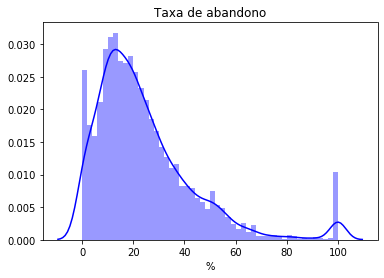

In [46]:
sns.distplot(df_reg.perc_abandono, hist=True, kde=True, bins=int(50),color = 'blue')
plt.title('Taxa de abandono')
plt.xlabel('%')

## fazer log

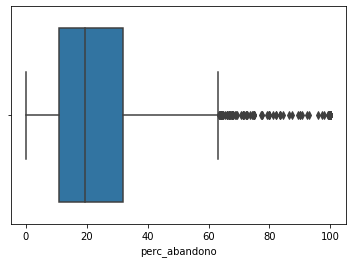

In [47]:
sns.boxplot(df_reg.perc_abandono)

In [48]:
### transformar % de abandono em log

# somar uma constante na variavel taxa porque tem muito valor 0.
## trasnformar em log
df_reg['log_abandono'] = np.log(df_reg.perc_abandono + 2)

Text(0.5, 0, '%')

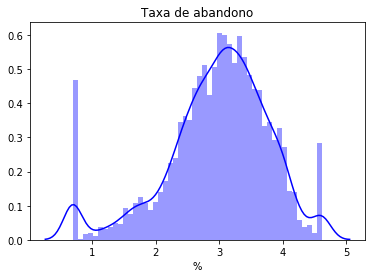

In [49]:
sns.distplot(df_reg.log_abandono, hist=True, kde=True, bins=int(50),color = 'blue')
plt.title('Taxa de abandono')
plt.xlabel('%')


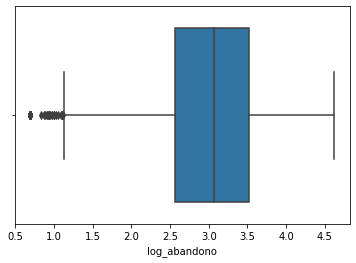

In [50]:
sns.boxplot(df_reg.log_abandono)

### VIs: 

* Taxa Sem Graduação
* Taxa Graduação
* Taxa Especialização
* Taxa Mestrado
* Taxa Doutorado

Text(0.5, 0, '%')

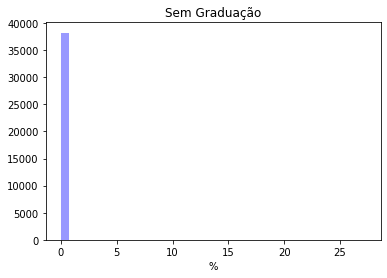

In [51]:
sns.distplot(df_reg.perc_Sem_Graduação, hist=True, kde=False, bins=int(40),color = 'blue')
plt.title('Sem Graduação')
plt.xlabel('%')

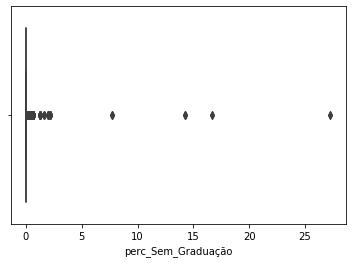

In [52]:
sns.boxplot(df_reg.perc_Sem_Graduação)

Text(0.5, 0, '%')

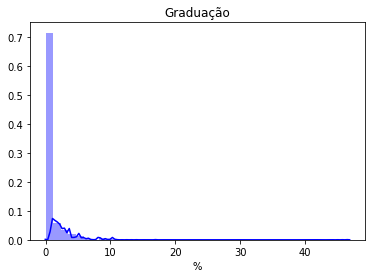

In [53]:
sns.distplot(df_reg.perc_Graduação, hist=True, kde=True, bins=int(40),color = 'blue')
plt.title('Graduação')
plt.xlabel('%')

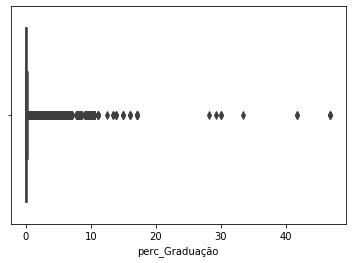

In [54]:
sns.boxplot(df_reg.perc_Graduação)

In [55]:
# transformar em log, porque é assimétrica a direita
## somar uma constante, porque tem muito valor 0

df_reg['graduacao_log'] = np.log(df_reg.perc_Graduação + 2)

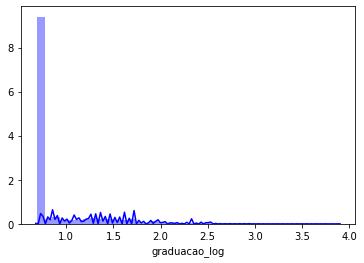

In [56]:
sns.distplot(df_reg.graduacao_log, hist = True, kde = True, bins = int(40), color = 'blue')

Devido ao grande número de taxa = 0%, as variáveis sem graduação e gradução são muito assimétricas à direita.

Text(0.5, 0, '%')

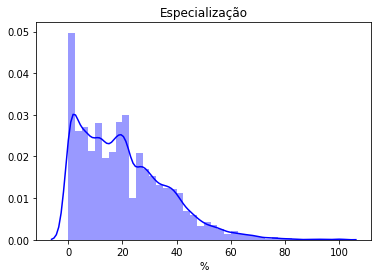

In [57]:
sns.distplot(df_reg.perc_Especialização, hist=True, kde=True, bins=int(40),color = 'blue')
plt.title('Especialização')
plt.xlabel('%')

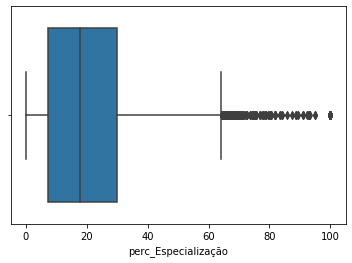

In [58]:
sns.boxplot(df_reg.perc_Especialização)

In [59]:
## tranformar % de especializao em log
df_reg['especializacao_log'] = np.log(df_reg.perc_Especialização + 2)

Text(0.5, 0, '%')

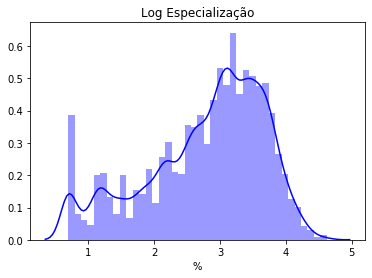

In [60]:
sns.distplot(df_reg.especializacao_log, hist=True, kde=True, bins=int(40),color = 'blue')
plt.title('Log Especialização')
plt.xlabel('%')

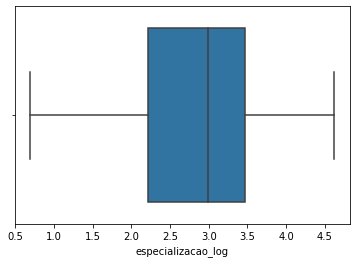

In [61]:
sns.boxplot(df_reg.especializacao_log)

Text(0.5, 0, '%')

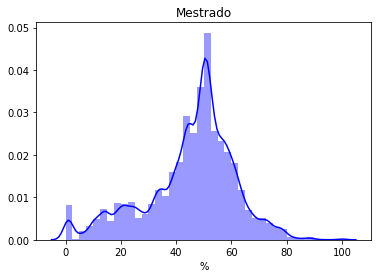

In [62]:
sns.distplot(df_reg.perc_Mestrado, hist=True, kde=True, bins=int(40),color = 'blue')
plt.title('Mestrado')
plt.xlabel('%')

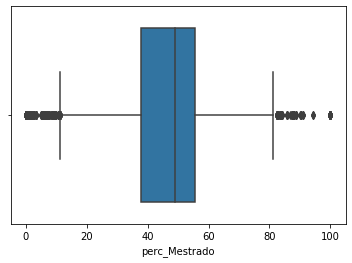

In [63]:
sns.boxplot(df_reg.perc_Mestrado)

In [64]:
## tranformar % de mestrado em log
df_reg['mestrado_log'] = np.log(df_reg.perc_Mestrado + 2)

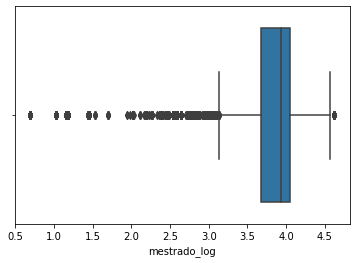

In [65]:
sns.boxplot(df_reg.mestrado_log)

## a distribuicao de % mestrado log parece menos comportada

Text(0.5, 0, '%')

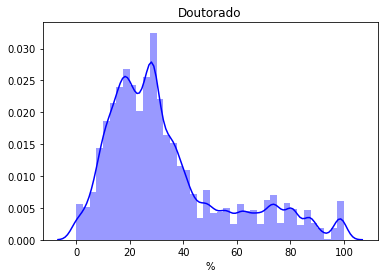

In [66]:
sns.distplot(df_reg.perc_Doutorado, hist=True, kde=True, bins=int(40),color = 'blue')
plt.title('Doutorado')
plt.xlabel('%')

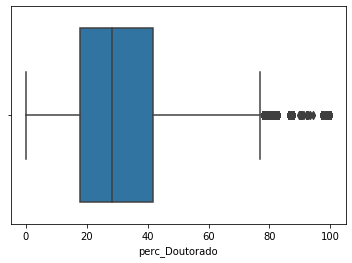

In [67]:
sns.boxplot(df_reg.perc_Doutorado)

In [68]:
df_reg['doutorado_log'] = np.log(df_reg.perc_Doutorado + 2)

Text(0.5, 0, '%')

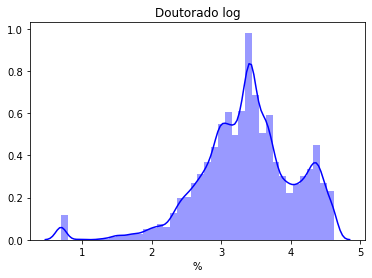

In [69]:
sns.distplot(df_reg.doutorado_log, hist=True, kde=True, bins=int(40),color = 'blue')
plt.title('Doutorado log')
plt.xlabel('%')

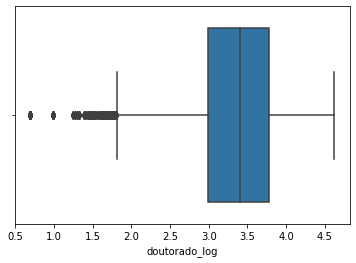

In [70]:
sns.boxplot(df_reg.doutorado_log)

## Regressão Linear

$$ \hat{Abandono} = b_0 + b_1 * Especialização + b_2 * Mestrado +  b_3 * Doutorado+\hat{u} $$

* H0: $$b_1 = b_2 = b_3$$

* Ha:
$$b_1 > b_2 > b_3$$

In [71]:
function1 = ''' perc_abandono ~ perc_Especialização + perc_Mestrado + perc_Doutorado '''
linear1 = smf.ols(function1, df_reg).fit()
print(linear1.summary())

                            OLS Regression Results                            
Dep. Variable:          perc_abandono   R-squared:                       0.111
Model:                            OLS   Adj. R-squared:                  0.111
Method:                 Least Squares   F-statistic:                     163.4
Date:                Mon, 04 May 2020   Prob (F-statistic):          8.94e-100
Time:                        07:59:18   Log-Likelihood:                -16964.
No. Observations:                3920   AIC:                         3.394e+04
Df Residuals:                    3916   BIC:                         3.396e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -5.6864    

In [72]:
function2 = '''log_abandono ~ perc_Especialização + perc_Mestrado + perc_Doutorado'''
linear2 = smf.ols(function2, df_reg).fit()
print(linear2.summary())

                            OLS Regression Results                            
Dep. Variable:           log_abandono   R-squared:                       0.102
Model:                            OLS   Adj. R-squared:                  0.101
Method:                 Least Squares   F-statistic:                     148.1
Date:                Mon, 04 May 2020   Prob (F-statistic):           6.20e-91
Time:                        07:59:18   Log-Likelihood:                -4582.7
No. Observations:                3920   AIC:                             9173.
Df Residuals:                    3916   BIC:                             9199.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               3.1165    

In [73]:
function3 = '''log_abandono ~ especializacao_log + mestrado_log + doutorado_log'''
linear3 = smf.ols(function3, df_reg).fit()
print(linear3.summary())

                            OLS Regression Results                            
Dep. Variable:           log_abandono   R-squared:                       0.086
Model:                            OLS   Adj. R-squared:                  0.086
Method:                 Least Squares   F-statistic:                     123.5
Date:                Mon, 04 May 2020   Prob (F-statistic):           2.07e-76
Time:                        07:59:18   Log-Likelihood:                -4616.3
No. Observations:                3920   AIC:                             9241.
Df Residuals:                    3916   BIC:                             9266.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              2.8054      0

In [74]:
function4 = '''perc_abandono ~ especializacao_log + perc_Mestrado + perc_Doutorado'''
linear4 = smf.ols(function4, df_reg).fit()
print(linear4.summary())

                            OLS Regression Results                            
Dep. Variable:          perc_abandono   R-squared:                       0.119
Model:                            OLS   Adj. R-squared:                  0.118
Method:                 Least Squares   F-statistic:                     176.5
Date:                Mon, 04 May 2020   Prob (F-statistic):          2.38e-107
Time:                        07:59:18   Log-Likelihood:                -16947.
No. Observations:                3920   AIC:                         3.390e+04
Df Residuals:                    3916   BIC:                         3.393e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            -55.9605      8

In [75]:
function5 = '''perc_abandono ~ perc_Sem_Graduação + graduacao_log + especializacao_log + perc_Mestrado + perc_Doutorado'''
linear5 = smf.ols(function5, df_reg).fit()
print(linear5.summary())

                            OLS Regression Results                            
Dep. Variable:          perc_abandono   R-squared:                       0.120
Model:                            OLS   Adj. R-squared:                  0.119
Method:                 Least Squares   F-statistic:                     106.8
Date:                Mon, 04 May 2020   Prob (F-statistic):          5.72e-106
Time:                        07:59:18   Log-Likelihood:                -16945.
No. Observations:                3920   AIC:                         3.390e+04
Df Residuals:                    3914   BIC:                         3.394e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            -53.9733      8

### Modelo linear escolhido:

Ao considerar a natureza dos dados e expectativa teórica:

$$ \hat{Abandono} = b_0 + b_1 * Especialização + b_2 * Mestrado +  b_3 * Doutorado+\hat{u} $$

* H0: 

$$ b_1 = b_2 = b_3$$

* Ha:

$$ b_1 > b_2 > b_3$$

In [76]:
print(linear1.summary())

                            OLS Regression Results                            
Dep. Variable:          perc_abandono   R-squared:                       0.111
Model:                            OLS   Adj. R-squared:                  0.111
Method:                 Least Squares   F-statistic:                     163.4
Date:                Mon, 04 May 2020   Prob (F-statistic):          8.94e-100
Time:                        07:59:18   Log-Likelihood:                -16964.
No. Observations:                3920   AIC:                         3.394e+04
Df Residuals:                    3916   BIC:                         3.396e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -5.6864    

### Interpretação 

Esse modelo explica 11% da varição na taxa de abandono por curso.

Não podemos rejeitar a hipótese nula de que todos os coeficientes têm o mesmo efeito, porque os intervalos de confiança se interpolam, portanto não são estatisticamente diferentes. Ademais o único efeito estatisticamente significativo é o do percentual de docentes com Mestrado.

### Pressupostos da regressão

&#x2611;  Relação Linear;

&#x2610;  Ausência de Multicolinearidade;

&#x2611;  Distribuição Normal dos erros;

&#x2610;  Ausência de outliers significativos;

&#x2611;  Homocedasticidade;

&#x2610;  Heterogeneidade;

&#x2610;  Endogeneidade

#### Relação Linear

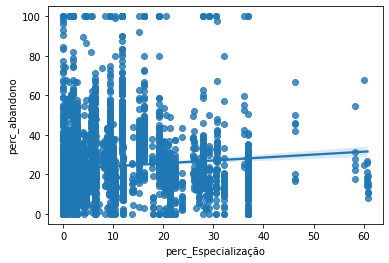

In [77]:
sns.regplot(x = df_reg.perc_Especialização, y = df_reg.perc_abandono, ci = 95)

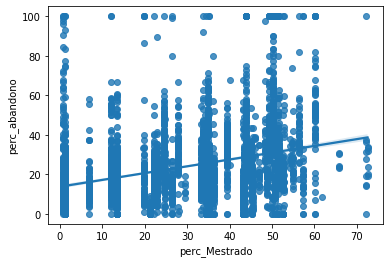

In [78]:
sns.regplot(x = df_reg.perc_Mestrado, y = df_reg.perc_abandono, ci = 95)

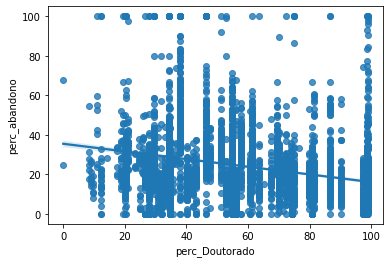

In [79]:
sns.regplot(x = df_reg.perc_Doutorado, y = df_reg.perc_abandono, ci = 95)

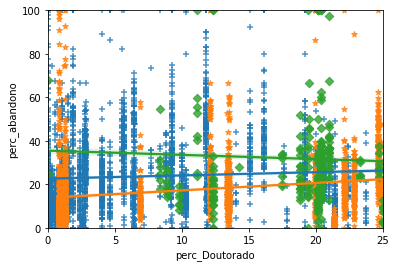

In [80]:
fig, ax = plt.subplots()

xlim = [0,25]
ax.set_xlim(xlim)

sns.regplot(x = df_reg.perc_Especialização, y = df_reg.perc_abandono, ci = 95, marker = '+')
sns.regplot(x = df_reg.perc_Mestrado, y = df_reg.perc_abandono, ci = 95, marker = '*')
sns.regplot(x = df_reg.perc_Doutorado, y = df_reg.perc_abandono, ci = 95, marker = 'D')

ax.set_ylim([0,100])
plt.show()

#### Correlação VD x VIs


* Abandono x Especialização: 0.08
* Abandono x Mestrado: 0.32
* Abandono x Doutorado: -0.25

Mestrado e Doutorado estão mais correlacionadas com taxa de abandono. Todavia em direções diferentes.
Isso sinaliza que aumentar a taxa de docentes com Doutorado poderia reduzir a taxa de abandono.

### Multicolinearidade

* Especialização x Doutorado: -0.72
* Mestrado x Doutorado: -0.73

In [81]:
#criar um df para ver se existe problema de multicolinearidade
df_pos_heat = df_reg[['perc_abandono', 'perc_Sem_Graduação', 'perc_Graduação', 'perc_Especialização',  'perc_Mestrado', 'perc_Doutorado']]

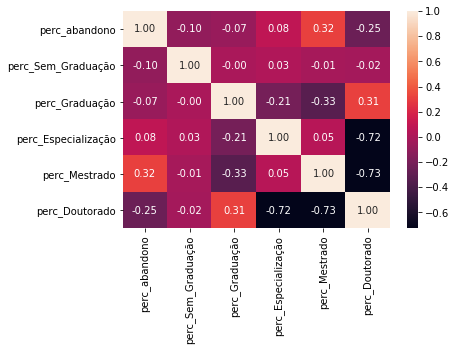

In [82]:
# heatmap
corr_heat = df_pos_heat.corr()

fig, ax = plt.subplots()
# plot the heatmap
sns.heatmap(corr_heat, 
            fmt='.2f',
            xticklabels=corr_heat.columns,
            yticklabels=corr_heat.columns,annot=True)

### Distribuição Normal dos resíduos

A distribuição dos resíduos se aproxima a uma distribuição normal, mas com assimetria a direita. Portanto a mediana é menor do que a média. 
A média dos resíduos é -1.03, próxima a 0.

In [83]:
linear1.resid.describe()

count    3.920000e+03
mean    -4.340383e-14
std      1.833475e+01
min     -4.214986e+01
25%     -1.108246e+01
50%     -3.378821e+00
75%      7.022523e+00
max      8.562176e+01
dtype: float64

In [84]:
# adicionar variavel residuo ao df
df_reg['residuo'] = linear1.resid

Text(0.5, 0, '%')

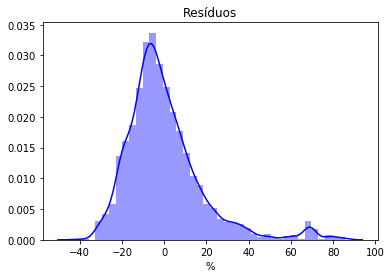

In [85]:
sns.distplot(linear1.resid, hist=True, kde=True, bins=int(40),color = 'blue')
plt.title('Resíduos')
plt.xlabel('%')

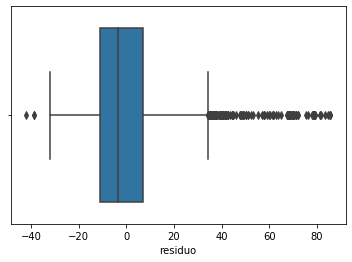

In [86]:
sns.boxplot(df_reg.residuo)

### Homocedasticidade

Os resíduos do modelo têm mesma variância em relação a taxa de abandono predita. Portanto, nosso modelo está errando igual para diferentes níveis do valor predito.

Text(0.5, 0, 'Taxa de Abandono Predita')

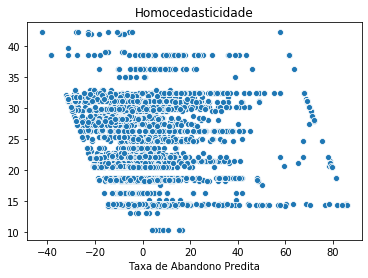

In [87]:
sns.scatterplot(x = linear1.resid, y = linear1.predict(), ci = 95)
plt.title('Homocedasticidade')
plt.xlabel('Resíduos')
plt.xlabel('Taxa de Abandono Predita')

### Endogeneidade

O resíduo está correlacionado com a taxa de abandono. Portanto devemos incluir outras variáveis explicativas no modelo.

Text(0.5, 0, 'Taxa de Abandono')

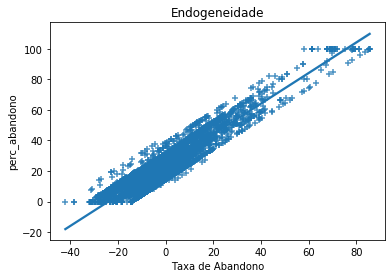

In [88]:
sns.regplot(x = df_reg.residuo, y = df_reg.perc_abandono, ci = 95, marker = '+')
plt.title('Endogeneidade')
plt.xlabel('Resíduos')
plt.xlabel('Taxa de Abandono')



### Regressão Linear com Controle

 Averiguar quais variáveis  do df mais se correlacionam com a taxa de abandono.

In [89]:
corr_abandono = df_reg.corr().round(2)['perc_abandono']

In [90]:
corr_abandono.sort_values()

IN_GRATUITO                      -0.39
NU_INTEGRALIZACAO_INTEGRAL       -0.39
NU_CARGA_HORARIA                 -0.32
IN_INTEGRAL                      -0.28
NU_INTEGRALIZACAO_NOTURNO        -0.28
                                  ... 
IN_ESPACO_ATENDIMENTO_ADAPTADO     NaN
IN_MOBILIARIO_ADAPTADO             NaN
IN_BEBEDOURO_LAVABO_ADAPTADO       NaN
NU_ANO_CENSO                       NaN
IN_ACESSO_OUTRAS_BASES             NaN
Name: perc_abandono, Length: 224, dtype: float64

In [91]:
corr_abandono.sort_values(ascending = False)

perc_abandono                     1.00
residuo                           0.94
log_abandono                      0.86
TP_CATEGORIA_ADMINISTRATIVA_l     0.36
perc_Mestrado                     0.32
                                  ... 
IN_ESPACO_ATENDIMENTO_ADAPTADO     NaN
IN_MOBILIARIO_ADAPTADO             NaN
IN_BEBEDOURO_LAVABO_ADAPTADO       NaN
NU_ANO_CENSO                       NaN
IN_ACESSO_OUTRAS_BASES             NaN
Name: perc_abandono, Length: 224, dtype: float64

In [92]:
correl = corr_abandono.to_frame()

In [93]:
#corr_abandono_filt = correl[(correl.perc_abandono <= -0.01) | (correl.perc_abandono >= 0.01)]

In [94]:
#corr_abandono_filt.sort_values(by = 'perc_abandono')

In [95]:
corr_abandono_filt = correl[(correl.perc_abandono <= -0.2) | (correl.perc_abandono >= 0.2)]

In [96]:
corr_abandono_filt.sort_values(by = 'perc_abandono')

,perc_abandono
IN_GRATUITO,-0.39
NU_INTEGRALIZACAO_INTEGRAL,-0.39
NU_CARGA_HORARIA,-0.32
IN_INTEGRAL,-0.28
NU_INTEGRALIZACAO_NOTURNO,-0.28
perc_Doutorado,-0.25
QT_INSC_VAGA_NOVA_NOTURNO,-0.23
doutorado_log,-0.22
Doutorado,-0.22
todos,-0.21


IN_GRATUITO:

0: não gratuito

1: gratuito

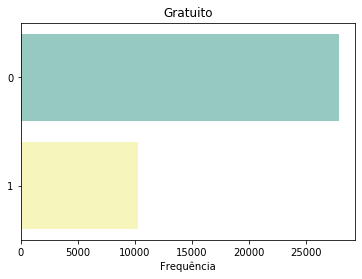

In [97]:
#Grafico de barras
ax = sns.countplot(data = df_reg, y = 'IN_GRATUITO', palette = "Set3")
ax.set_yticklabels(ax.get_yticklabels(), ha="right")
#plt.tight_layout()

# Adicionar legenda
plt.title('Gratuito')
plt.xlabel('Frequência') 
plt.ylabel('') 
plt.show()

NU_CARGA_HORARIA

* Carga Horária Mínima do Curso

In [98]:
df_reg.NU_CARGA_HORARIA.describe()

count    38256.000000
mean      3310.154041
std       1156.900055
min          0.000000
25%       2800.000000
50%       3213.000000
75%       3850.000000
max      32080.000000
Name: NU_CARGA_HORARIA, dtype: float64

Text(0.5, 0, '%')

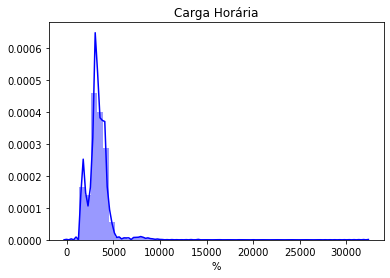

In [99]:
sns.distplot(df_reg.NU_CARGA_HORARIA, hist=True, kde=True, bins=int(50),color = 'blue')
plt.title('Carga Horária')
plt.xlabel('%')

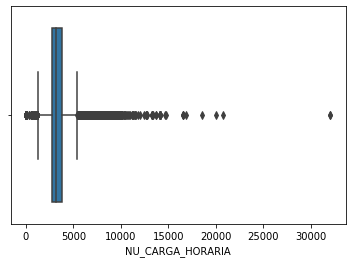

In [100]:
sns.boxplot(df_reg.NU_CARGA_HORARIA)
# Assimetrica a direita, transformar em log

In [101]:
df_reg['carga_log'] = np.log(df_reg.NU_CARGA_HORARIA + 2)

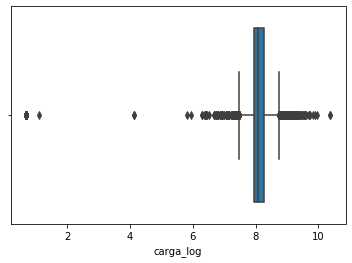

In [102]:
sns.boxplot(df_reg.carga_log)

Text(0.5, 0, '%')

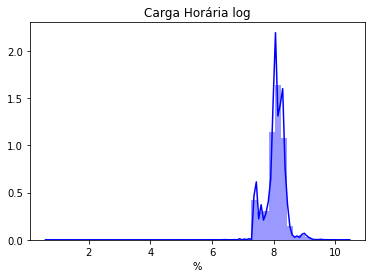

In [103]:
sns.distplot(df_reg.carga_log, hist=True, kde=True, bins=int(50),color = 'blue')
plt.title('Carga Horária log')
plt.xlabel('%')

#### Noturno

Informa se o curso presencial funciona no turno noturno

* 0 = Sim
* 1 = Não

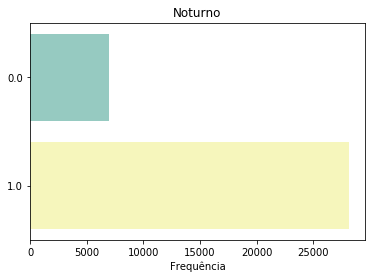

In [104]:
#Grafico de barras
ax = sns.countplot(data = df_reg, y = 'IN_NOTURNO', palette = "Set3")
ax.set_yticklabels(ax.get_yticklabels(), ha="right")
#plt.tight_layout()

# Adicionar legenda
plt.title('Noturno')
plt.xlabel('Frequência') 
plt.ylabel('') 
plt.show()

### Despesa por Professor

* VL_DESPESA_PESSOAL_DOCENTE/Todos

* VL_DESPESA_PESSOAL_DOCENTE
    * Valor das despesas com remuneração de pessoal - docentes ativos da IES ou da mantenedora

* Todos:
    * Número total de Doscentes

In [105]:
df_reg['despesa_prof'] = df_reg.VL_DESPESA_PESSOAL_DOCENTE/df_reg.todos

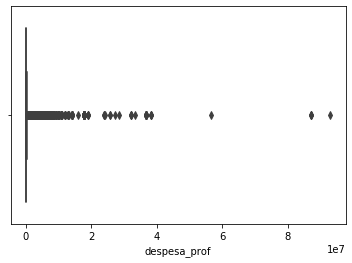

In [106]:
sns.boxplot(df_reg.despesa_prof)

In [107]:
df_reg['despesa_prof_log'] = np.log(df_reg.despesa_prof)

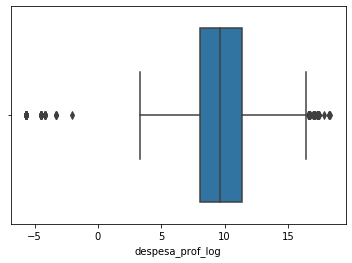

In [108]:
sns.boxplot(df_reg.despesa_prof_log)

Optei por não utilizar o log de Carga Horária, porque reduz a explicabilidade do modelo.

## Regressão Linear com Controle

$$ \hat{Abandono} = b_0 + b_1 * Especialização + b_2 * Mestrado +  b_3 * Doutorado + b_4 * Área + b_5 * Gratuito + b_6 * Carga +  \hat{u} $$

* H0:
$$b_1 = 0$$
$$b_2 = 0$$
$$b_3 = 0$$
$$b_4 = 0$$
$$b_5 = 0$$
$$b_6 = 0$$

* Ha:
$$b_1 > 0$$
$$b_2 < 0$$ 
$$b_3 < 0$$
$$b_4 \neq 0$$
$$b_5 < 0$$
$$b_6 < 0$$

In [109]:
function7 = ''' perc_abandono ~ perc_Especialização + perc_Mestrado + perc_Doutorado + NO_CINE_AREA_GERAL  + IN_GRATUITO + NU_CARGA_HORARIA + IN_NOTURNO + despesa_prof'''
linear7 = smf.ols(function7, df_reg).fit()
print(linear7.summary())

                            OLS Regression Results                            
Dep. Variable:          perc_abandono   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:                     160.7
Date:                Mon, 04 May 2020   Prob (F-statistic):          3.97e-257
Time:                        07:59:35   Log-Likelihood:                -15485.
No. Observations:                3689   AIC:                         3.099e+04
Df Residuals:                    3679   BIC:                         3.105e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

In [110]:
function9 = ''' perc_abandono ~ perc_Especialização + perc_Mestrado + perc_Doutorado + despesa_prof_log + NO_CINE_AREA_GERAL  + IN_GRATUITO + carga_log + IN_NOTURNO '''
linear9 = smf.ols(function9, df_reg).fit()
print(linear9.summary())

                            OLS Regression Results                            
Dep. Variable:          perc_abandono   R-squared:                       0.264
Model:                            OLS   Adj. R-squared:                  0.262
Method:                 Least Squares   F-statistic:                     146.6
Date:                Mon, 04 May 2020   Prob (F-statistic):          3.22e-237
Time:                        07:59:35   Log-Likelihood:                -15532.
No. Observations:                3689   AIC:                         3.108e+04
Df Residuals:                    3679   BIC:                         3.115e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

In [111]:
function8 = ''' perc_abandono ~ perc_Especialização + perc_Mestrado + perc_Doutorado + despesa_prof_log + NO_CINE_AREA_GERAL  + IN_GRATUITO + NU_CARGA_HORARIA + IN_NOTURNO '''
linear8 = smf.ols(function8, df_reg).fit()
print(linear8.summary())

                            OLS Regression Results                            
Dep. Variable:          perc_abandono   R-squared:                       0.285
Model:                            OLS   Adj. R-squared:                  0.283
Method:                 Least Squares   F-statistic:                     163.1
Date:                Mon, 04 May 2020   Prob (F-statistic):          1.52e-260
Time:                        07:59:35   Log-Likelihood:                -15478.
No. Observations:                3689   AIC:                         3.098e+04
Df Residuals:                    3679   BIC:                         3.104e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

#### Controlar por ano de funcionamento

Importante controlar por essa variável, porque cursos mais antigos podem ter mais alunos formados, o que impacta na nossa variável depedente. Pois ela é a porcentagem de alunos que não estão matriculados ou não são formados por curso.

In [140]:
df_reg.DT_INICIO_FUNCIONAMENTO = df_reg.DT_INICIO_FUNCIONAMENTO.replace({'16/10/2917':'16/10/2017'})

In [141]:
df_reg['DT_INICIO_FUNCIONAMENTO']= df_reg['DT_INICIO_FUNCIONAMENTO'].astype('datetime64') 

In [142]:
df_reg['Ano_Funcionamento'] = df_reg['DT_INICIO_FUNCIONAMENTO'].dt.year

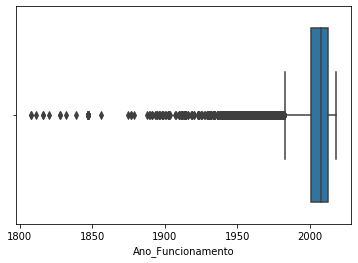

In [146]:
sns.boxplot(df_reg.Ano_Funcionamento)

In [149]:
df_reg['ano_log'] = np.log(df_reg.Ano_Funcionamento)

In [151]:
df_reg.Ano_Funcionamento.describe()

count    35668.000000
mean      2003.471655
std         16.318425
min       1808.000000
25%       2001.000000
50%       2008.000000
75%       2013.000000
max       2018.000000
Name: Ano_Funcionamento, dtype: float64

In [153]:
df_filt = df_reg[(df_reg.Ano_Funcionamento > 1900)]

In [156]:
function10 = ''' perc_abandono ~ perc_Especialização + perc_Mestrado + perc_Doutorado + despesa_prof_log + NO_CINE_AREA_GERAL  + IN_GRATUITO + NU_CARGA_HORARIA + IN_NOTURNO + Ano_Funcionamento
'''
linear10 = smf.ols(function10, df_reg).fit()
print(linear10.summary())

                            OLS Regression Results                            
Dep. Variable:          perc_abandono   R-squared:                       0.300
Model:                            OLS   Adj. R-squared:                  0.298
Method:                 Least Squares   F-statistic:                     152.3
Date:                Mon, 04 May 2020   Prob (F-statistic):          2.64e-266
Time:                        09:29:58   Log-Likelihood:                -14834.
No. Observations:                3557   AIC:                         2.969e+04
Df Residuals:                    3546   BIC:                         2.976e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

Esse modelo de regressão linear explica 28,3% da variação da taxa de abandono.

As variáveis sobre grau de instrução dos docentes são estatisticamente significativas, porém os betas são pequenos. Ademais, a diferença entre os coeficientes não é estatiscamente significativa. Porque os 95%IC se interpolam.

A cada real gasto no salário dos professores, a taxa de abandono cai 0.73 pontos percentuais.

Os cursos de Exatas e Humanas têm uma maior taxa de abandono do que os de Biológicas. Porém, não podemos afirmar que o de Exatas têm uma taxa maior, porque o 95%IC desse coeficiente se interpola com o de Humanas.

Os cursos gratuitos possuem uma menor taxa de abandono do que os pagos. O curso não ser pago reduz 14,75 pontos % a taxa de abandono.

O aumento de carga horária tem efeito significativo, porém o coeficiente é irrisório.

O fato do curso ser noturno tem um efeito positivo na taxa de abandono, porém não é significativo.

### Pressupostos da regressão

&#x2610;  Relação Linear;

&#x2610;  Ausência de Multicolinearidade;

&#x2611;  Distribuição Normal dos erros;

&#x2610;  Ausência de outliers significativos;

&#x2611;  Homocedasticidade;

&#x2610;  Heterogeneidade;

&#x2610;  Endogeneidade

#### Relação Linear

Carga Horária não se relaciona linearmente com taxa de abandono.

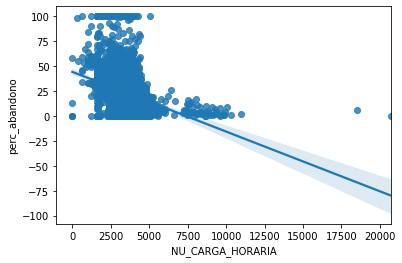

In [128]:
sns.regplot(x = df_reg.NU_CARGA_HORARIA , y = df_reg.perc_abandono, ci = 95)

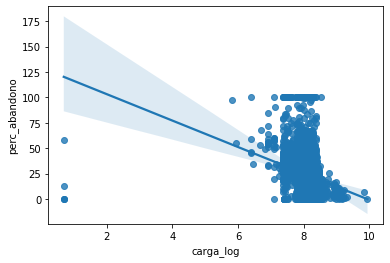

In [171]:
sns.regplot(x = df_reg.carga_log , y = df_reg.perc_abandono, ci = 95)

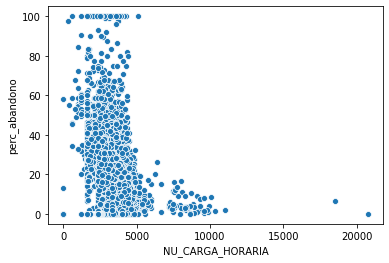

In [112]:
sns.scatterplot(x = df_reg.NU_CARGA_HORARIA , y = df_reg.perc_abandono)

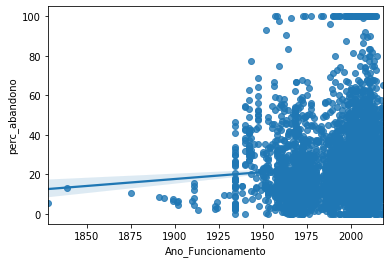

In [173]:
sns.regplot(x = df_reg.Ano_Funcionamento , y = df_reg.perc_abandono, ci = 95)

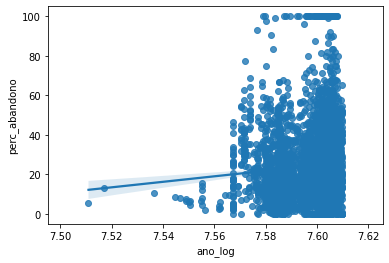

In [174]:
sns.regplot(x = df_reg.ano_log , y = df_reg.perc_abandono, ci = 95)

### Multicolinearidade

In [157]:
df_reg_correl = df_reg[[ 'perc_abandono', 'perc_Especialização', 'perc_Mestrado', 'perc_Doutorado','NO_CINE_AREA_GERAL','NU_CARGA_HORARIA', 'despesa_prof_log', 'Ano_Funcionamento']]

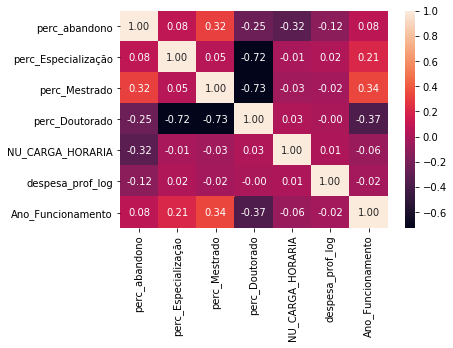

In [158]:
# heatmap
corr5 = df_reg_correl.corr()

fig, ax = plt.subplots()
# plot the heatmap
sns.heatmap(corr5, 
            fmt='.2f',
            xticklabels=corr5.columns,
            yticklabels=corr5.columns,annot=True)

### Distribuição Normal dos Resíduos

A distribuição dos resíduos se assemelha a um distribuição normal.

In [159]:
linear10.resid.describe()

count    3.557000e+03
mean    -3.022860e-12
std      1.566778e+01
min     -4.289872e+01
25%     -8.993841e+00
50%     -2.498779e+00
75%      5.716196e+00
max      8.591948e+01
dtype: float64

In [160]:
# adicionar variavel residuo ao df
df_reg['residuo10'] = linear10.resid

Text(0.5, 0, '%')

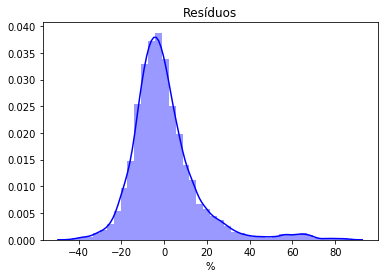

In [161]:
sns.distplot(linear10.resid, hist=True, kde=True, bins=int(40),color = 'blue')
plt.title('Resíduos')
plt.xlabel('%')

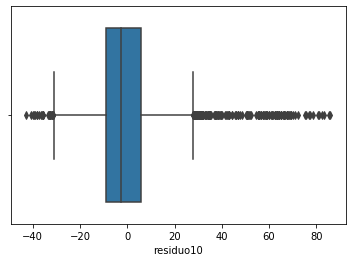

In [162]:
sns.boxplot(df_reg.residuo10)

### Homocedasticidade

Os resíduos do modelo não têm mesma variância em relação a taxa de abandono predita. Portanto não homocedástico.

Text(0.5, 0, 'Taxa de Abandono Predita')

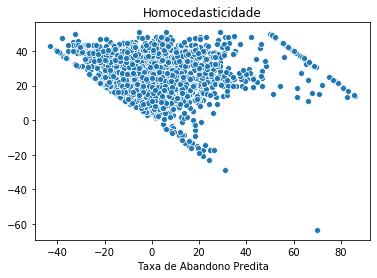

In [163]:
sns.scatterplot(x = linear10.resid, y = linear10.predict(), ci = 95)
plt.title('Homocedasticidade')
plt.xlabel('Resíduos')
plt.xlabel('Taxa de Abandono Predita')

O modelo não é homocesdático.

### Endogeneidade

O resíduo está correlacionado com a taxa de abandono. Portanto devemos incluir outras variáveis explicativas no modelo.

Text(0.5, 0, 'Taxa de Abandono')

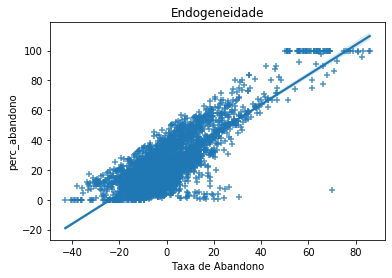

In [164]:
sns.regplot(x = df_reg.residuo10, y = df_reg.perc_abandono, ci = 95, marker = '+')
plt.title('Endogeneidade')
plt.xlabel('Resíduos')
plt.xlabel('Taxa de Abandono')

### Métricas

* MSE: Mean Squared Error
* RMSE: Root Mean Squared Error
* MAE: Mean Absolute Error (erro absoluto médio)
* MAPE: Mean Absolute Percentage Error
* MPE: Mean Percentage Error 

In [121]:
# importando a biblioteca SKLEARN
from sklearn import metrics

In [165]:
# definir y predito
df_reg['y_predict'] = linear10.predict(df_reg)

In [166]:
#metrics.mean_squared_error(df_reg.perc_abandono, df_reg.y_predict)
#mse = np.mean((df_reg.perc_abandono - df_reg.y_predict)**2)
mse = np.mean((linear10.resid)**2)
print('mse=', mse)

mse= 245.41042435491474


In [167]:
rmse = np.sqrt(mse)
print('rmse=', rmse)

rmse= 15.665580881503077


In [168]:
#mae = np.mean(np.abs(df_reg.perc_abandono - df_reg.y_predict))
mae = np.mean(np.abs(linear10.resid))
print('mae=', mae)

mae= 10.801331775279188


In [169]:
#mape = 100*np.mean(np.abs((df_reg.perc_abandono - df_reg.y_predict)/df_reg.perc_abandono))
mape = 100*np.mean(np.abs((linear10.resid)/df_reg.perc_abandono))
print('mape=',mape,'%')

mape= inf %


In [170]:
#mpe = 100*np.mean((df_reg.perc_abandono - df_reg.y_predict)/df_reg.perc_abandono)
mpe = 100*np.mean((linear10.resid)/df_reg.perc_abandono)
print('mpe=',mpe,'%')

mpe= -inf %
